In [1]:
import os
import sys
sys.path.append("..")
import phage_init

In [2]:
import pandas as pd
#d = {'model': [], 'class': [],'precision':[],'recall':[],'f1-score':[]}
d = {'model': [], 'class': [],'score_type':[],'value':[]}
df = pd.DataFrame(data=d)
F = open('all_models_table.txt','w') 

In [3]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std.p"), "rb" ) )

In [4]:
def add_to_df(df,test_Y_index, test_Y_predicted,model_name):
    labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
    labels_dataframe=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
                 "Tail shaft","Collar","Head-Tail joining","weighted avg"]
    for label in labels_dataframe:
        report=classification_report(test_Y_index, test_Y_predicted, target_names=labels_names,output_dict=True )
        #data_row=[report[label][i] for i in ['precision','recall',"f1-score"]]
        #data_row.insert(0,label)
        #data_row.insert(0,model_name)
        score_type='precision'
        data_row=[model_name,label,score_type,report[label][score_type]]
        df=df.append(pd.Series(data_row,index=df.columns),sort=False,ignore_index=True)
        score_type='recall'
        data_row=[model_name,label,score_type,report[label][score_type]]
        df=df.append(pd.Series(data_row,index=df.columns),sort=False,ignore_index=True)
        score_type='f1-score'
        data_row=[model_name,label,score_type,report[label][score_type]]
        df=df.append(pd.Series(data_row,index=df.columns),sort=False,ignore_index=True)
    return df
    


In [5]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [6]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [7]:
test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
labels_dataframe=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
                 "Tail shaft","Collar","Head-Tail joining","weighted avg"]

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import load_model
from sklearn.metrics import classification_report
import numpy

Using TensorFlow backend.


In [9]:
test_X=di_test
model_name='di.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.82      0.85      0.84        93
     Minor capsid       0.81      0.81      0.81        52
        Baseplate       0.77      0.83      0.80       103
       Major tail       0.82      0.67      0.73        54
       Minor tail       0.86      0.83      0.85        36
           Portal       0.84      0.79      0.82        73
       Tail fiber       0.68      0.54      0.60        87
       Tail shaft       0.66      0.65      0.65        48
           Collar       0.59      0.82      0.68        49
Head-Tail joining       0.95      0.99      0.97        80

        micro avg       0.78      0.78      0.78       675
        macro avg       0.78      0.78      0.77       675
     weighted avg       0.79      0.78      0.78       675



828

In [10]:
test_X=numpy.concatenate((di_test,tt_test),axis=1)
model_name='di_p.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.90      0.75      0.82        93
     Minor capsid       0.78      0.83      0.80        52
        Baseplate       0.84      0.82      0.83       103
       Major tail       0.82      0.74      0.78        54
       Minor tail       0.93      0.78      0.85        36
           Portal       0.90      0.75      0.82        73
       Tail fiber       0.50      0.66      0.56        87
       Tail shaft       0.68      0.62      0.65        48
           Collar       0.63      0.92      0.75        49
Head-Tail joining       0.99      0.89      0.93        80

        micro avg       0.77      0.77      0.77       675
        macro avg       0.80      0.78      0.78       675
     weighted avg       0.80      0.77      0.78       675



828

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")

In [12]:
test_X=tri_test
model_name='tri.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.85      0.81      0.83        93
     Minor capsid       0.82      0.88      0.85        52
        Baseplate       0.77      0.82      0.79       103
       Major tail       0.86      0.67      0.75        54
       Minor tail       0.94      0.86      0.90        36
           Portal       0.77      0.77      0.77        73
       Tail fiber       0.54      0.66      0.59        87
       Tail shaft       0.58      0.75      0.65        48
           Collar       0.42      0.22      0.29        49
Head-Tail joining       0.96      0.96      0.96        80

        micro avg       0.75      0.75      0.75       675
        macro avg       0.75      0.74      0.74       675
     weighted avg       0.76      0.75      0.75       675



828

In [13]:
test_X=numpy.concatenate((tri_test,tt_test),axis=1)
model_name='tri_p.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.85      0.83      0.84        93
     Minor capsid       0.83      0.73      0.78        52
        Baseplate       0.81      0.84      0.83       103
       Major tail       0.71      0.76      0.73        54
       Minor tail       0.97      0.78      0.86        36
           Portal       0.87      0.75      0.81        73
       Tail fiber       0.58      0.52      0.55        87
       Tail shaft       0.56      0.62      0.59        48
           Collar       0.51      0.55      0.53        49
Head-Tail joining       0.81      0.97      0.89        80

        micro avg       0.75      0.75      0.75       675
        macro avg       0.75      0.74      0.74       675
     weighted avg       0.75      0.75      0.75       675



828

In [14]:
test_X=di_sc_test
model_name='di_sc.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.68      0.82      0.74        93
     Minor capsid       0.84      0.69      0.76        52
        Baseplate       0.67      0.77      0.71       103
       Major tail       0.92      0.63      0.75        54
       Minor tail       0.88      0.61      0.72        36
           Portal       0.73      0.75      0.74        73
       Tail fiber       0.54      0.49      0.51        87
       Tail shaft       0.56      0.56      0.56        48
           Collar       0.55      0.65      0.60        49
Head-Tail joining       0.92      0.91      0.92        80

        micro avg       0.71      0.71      0.71       675
        macro avg       0.73      0.69      0.70       675
     weighted avg       0.72      0.71      0.71       675



828

In [15]:
test_X=numpy.concatenate((di_sc_test,tt_test),axis=1)
model_name='di_sc_p.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.73      0.83      0.78        93
     Minor capsid       0.84      0.79      0.81        52
        Baseplate       0.73      0.85      0.79       103
       Major tail       0.87      0.76      0.81        54
       Minor tail       0.88      0.81      0.84        36
           Portal       0.83      0.73      0.77        73
       Tail fiber       0.65      0.59      0.62        87
       Tail shaft       0.68      0.58      0.63        48
           Collar       0.56      0.65      0.60        49
Head-Tail joining       0.94      0.95      0.94        80

        micro avg       0.76      0.76      0.76       675
        macro avg       0.77      0.75      0.76       675
     weighted avg       0.77      0.76      0.76       675



828

In [16]:
test_X=tri_sc_test
model_name='tri_sc.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.79      0.83      0.81        93
     Minor capsid       0.85      0.79      0.82        52
        Baseplate       0.81      0.79      0.80       103
       Major tail       0.80      0.67      0.73        54
       Minor tail       0.96      0.75      0.84        36
           Portal       0.84      0.81      0.83        73
       Tail fiber       0.50      0.64      0.56        87
       Tail shaft       0.57      0.65      0.61        48
           Collar       0.36      0.27      0.31        49
Head-Tail joining       0.95      0.99      0.97        80

        micro avg       0.74      0.74      0.74       675
        macro avg       0.74      0.72      0.73       675
     weighted avg       0.75      0.74      0.74       675



828

In [17]:
test_X=numpy.concatenate((tri_sc_test,tt_test),axis=1)
model_name='tri_sc_p.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.81      0.83      0.82        93
     Minor capsid       0.80      0.79      0.80        52
        Baseplate       0.78      0.80      0.79       103
       Major tail       0.83      0.65      0.73        54
       Minor tail       0.84      0.75      0.79        36
           Portal       0.75      0.73      0.74        73
       Tail fiber       0.58      0.53      0.55        87
       Tail shaft       0.56      0.67      0.61        48
           Collar       0.51      0.57      0.54        49
Head-Tail joining       0.90      0.99      0.94        80

        micro avg       0.74      0.74      0.74       675
        macro avg       0.74      0.73      0.73       675
     weighted avg       0.74      0.74      0.74       675



828

In [18]:
test_X=test_X_total
model_name='all.h5'

model = load_model( os.path.join(phage_init.model_dir,model_name) )
test_Y_predicted = model.predict_classes(test_X)
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
df=add_to_df(df,test_Y_index, test_Y_predicted,model_name)
F.write(model_name)
F.write(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))

                   precision    recall  f1-score   support

     Major capsid       0.82      0.82      0.82        93
     Minor capsid       0.80      0.83      0.81        52
        Baseplate       0.84      0.81      0.82       103
       Major tail       0.76      0.63      0.69        54
       Minor tail       0.94      0.81      0.87        36
           Portal       0.80      0.78      0.79        73
       Tail fiber       0.48      0.57      0.52        87
       Tail shaft       0.53      0.67      0.59        48
           Collar       0.31      0.22      0.26        49
Head-Tail joining       0.96      0.97      0.97        80

        micro avg       0.73      0.73      0.73       675
        macro avg       0.72      0.71      0.71       675
     weighted avg       0.73      0.73      0.73       675



828

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
avg_df=df[df['class'] == 'weighted avg']

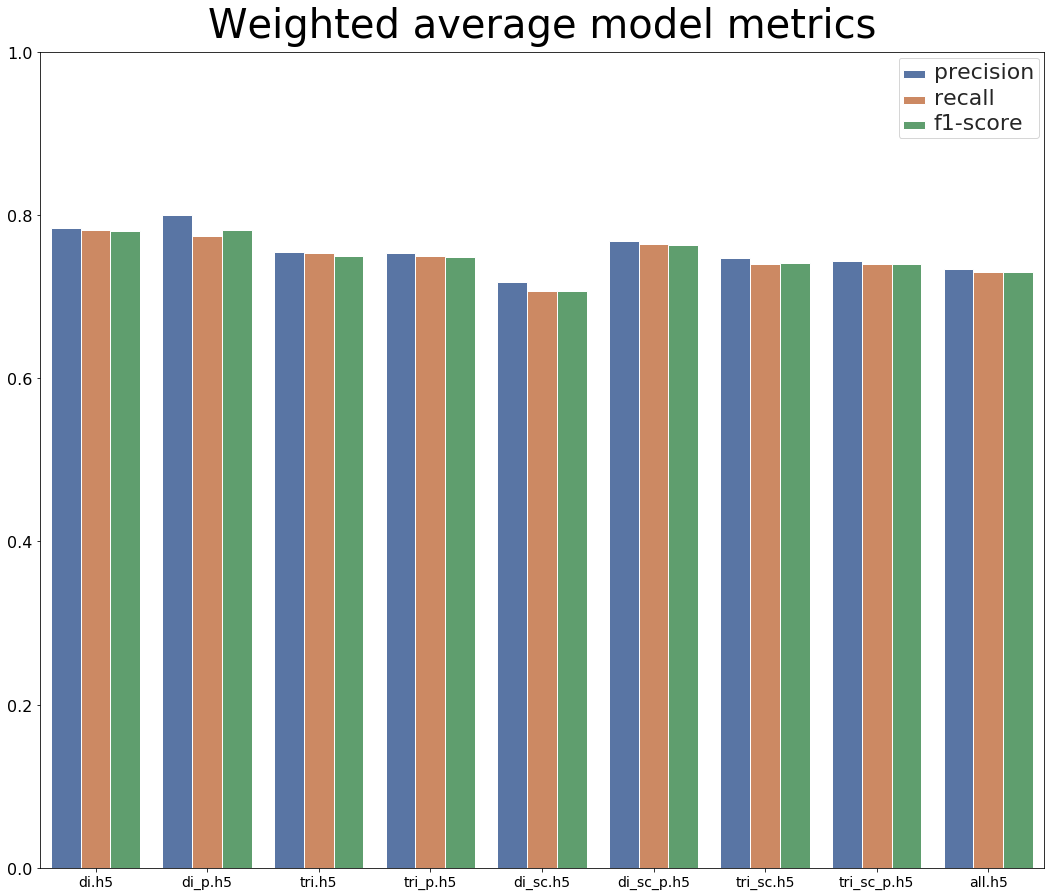

In [21]:
fig, ax = plt.subplots()

fig.set_size_inches(18, 15)
sns.set(style="whitegrid")
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=14)
ax.set_title('Weighted average model metrics', fontsize=40,va='bottom')
sns.barplot(ax=ax,y="value", x="model", hue="score_type", data=avg_df)
ax.set_ylabel('')    
ax.set_xlabel('')
l = ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
#print(dir(l))
ax.set(ylim=(0, 1))
plt.show()
fig.savefig('avg_score')


In [22]:
f1_df=df[df['score_type'] == 'f1-score']

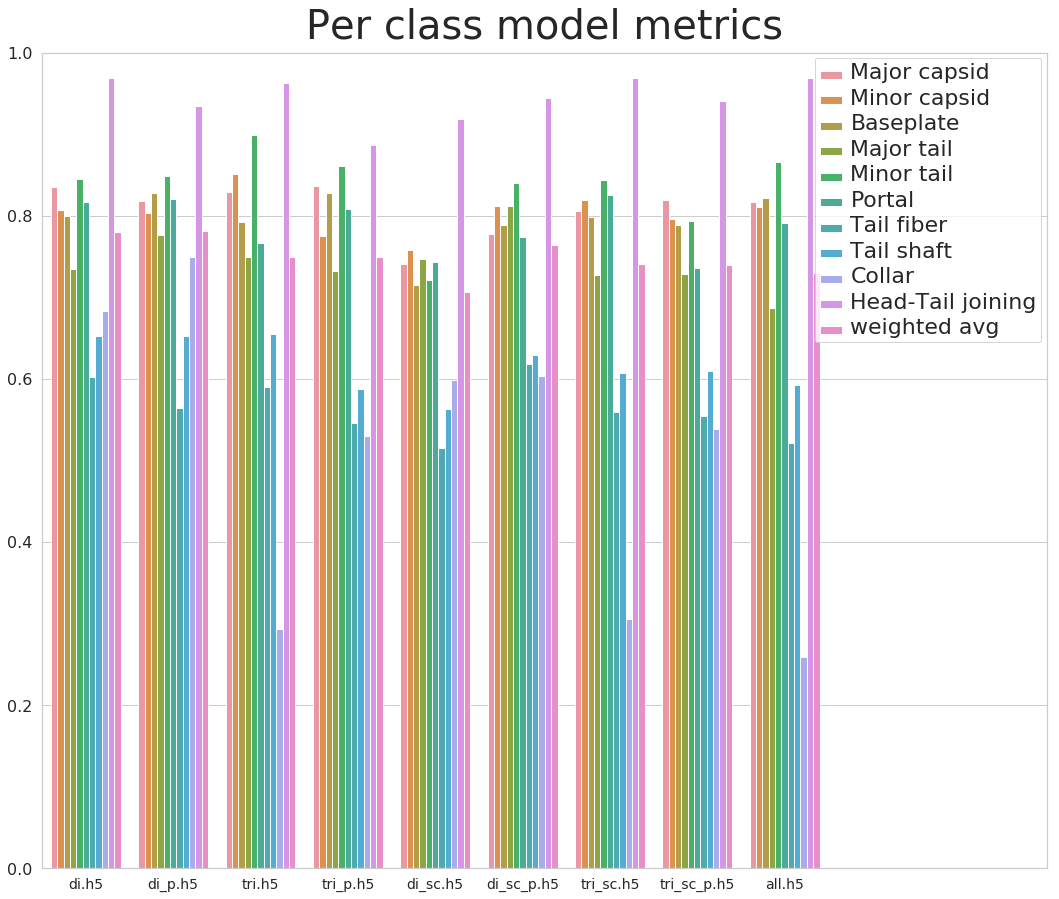

In [23]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(18, 15)
sns.set(style="whitegrid")
ax2.tick_params(axis='y',labelsize=16)
ax2.tick_params(axis='x',labelsize=14)
ax2.set_title('Per class model metrics', fontsize=40,va='bottom')
sns.barplot(ax=ax2,y="value", x="model", hue="class", data=f1_df)
ax2.set_ylabel('')    
ax2.set_xlabel('')
l = ax2.legend()
plt.setp(ax2.get_legend().get_texts(), fontsize='22') # for legend text
#print(dir(l))
ax2.set(ylim=(0, 1))
ax2.set(xlim=(-0.5, 11))
plt.show()
fig2.savefig('f1_score')

In [24]:
F.close()